# EDA Exploration
* The dataset is small. I prefer use pandas to load and processing
* Pyspark (on databricks env) isn't necessary

In [31]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
#matplot lib conf
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# figure size in inches
sns.set_theme(rc={'figure.figsize':(10,5)})
#for NLP
import spacy
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud

In [2]:
df_bronz = pd.read_csv('../data/bronze/train.csv')
df_bronz.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


In [3]:
df_bronz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

In [4]:
profile = ProfileReport(df_bronz, title="Property Profiling Report")
profile.to_file("../data/silver/property_report.html")

## City vs priceRange

<Axes: xlabel='city', ylabel='count'>

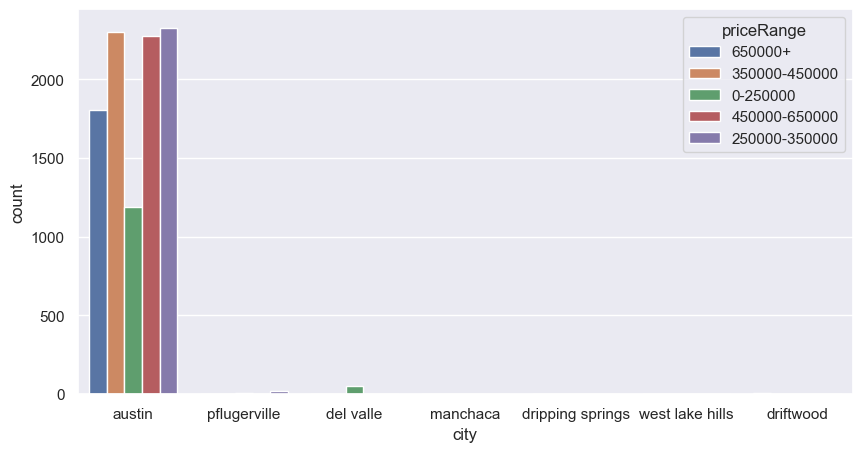

In [5]:
sns.countplot(df_bronz, x="city", hue="priceRange")

<Axes: xlabel='priceRange', ylabel='count'>

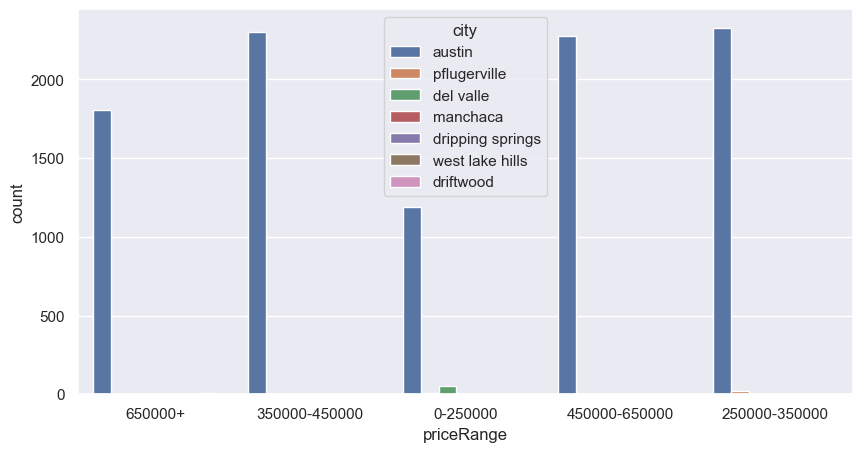

In [6]:
sns.countplot(df_bronz, x="priceRange", hue="city")

**variable city** has 99% of the data but it's distributed around all range price

recommend train a model only with this city data or exclude "city" of the predictions variables

## homeType vs priceRange

<Axes: xlabel='homeType', ylabel='count'>

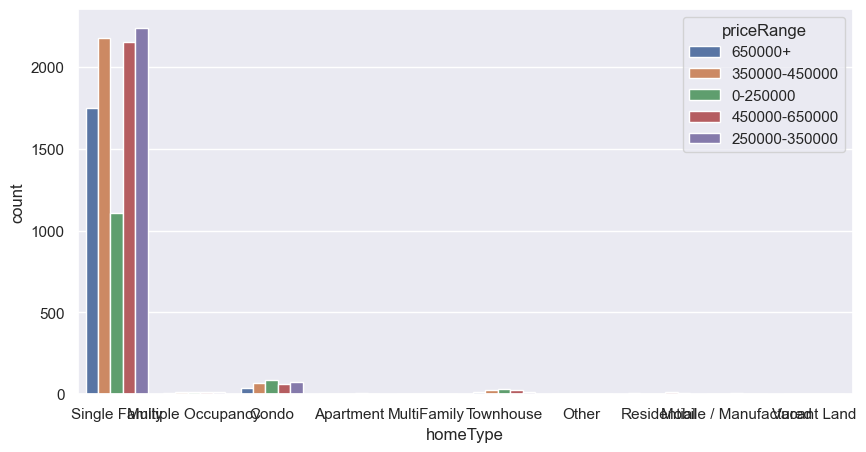

In [7]:
sns.countplot(df_bronz, x="homeType", hue="priceRange")

<Axes: xlabel='priceRange', ylabel='count'>

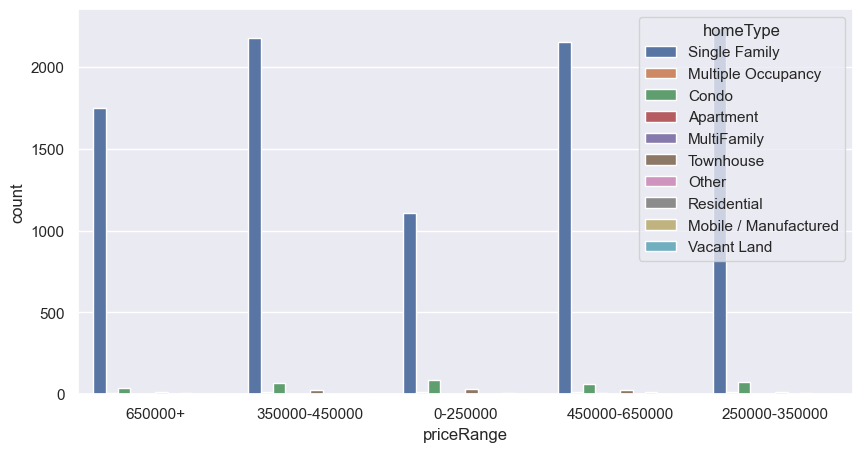

In [8]:
sns.countplot(df_bronz, x="priceRange", hue="homeType")

**homeType** isn't a determining factor to set the price and single family concerns the 94% of the data
* **Recommendation** Ignore hometype of the model

## hasSpa vs priceRange

<Axes: xlabel='hasSpa', ylabel='count'>

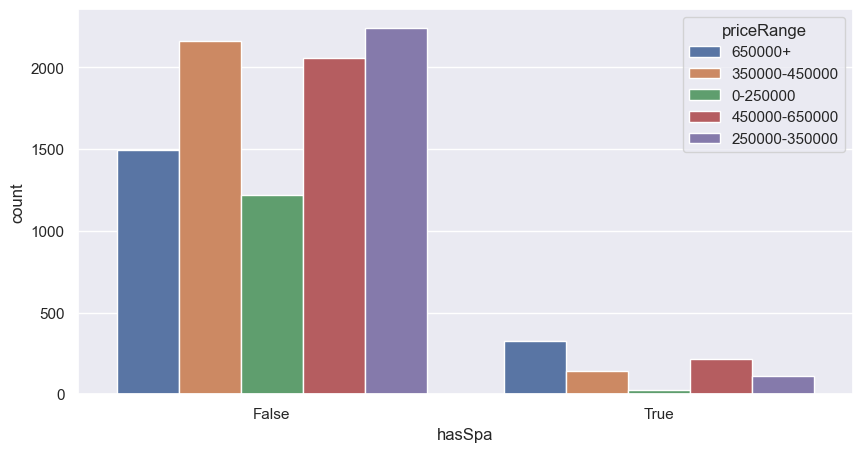

In [9]:
sns.countplot(df_bronz, x="hasSpa", hue="priceRange")

<Axes: xlabel='priceRange', ylabel='count'>

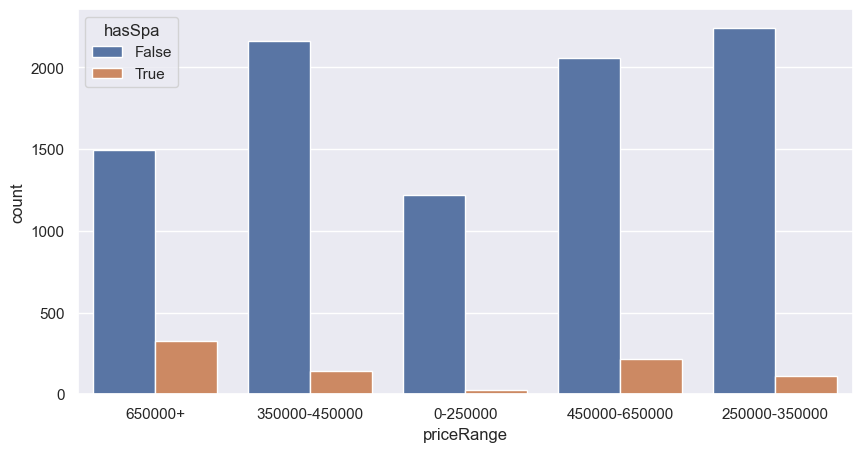

In [10]:
sns.countplot(df_bronz, x="priceRange", hue="hasSpa")

* **hasSpa** with 91% False. The relation with priceRange isn't important, but properties over 650000+ has slightly more Spa quantity

## School

### Correlation between MedianStudentsPerTeacher, avgSchoolRating and price

In [11]:
df_bronz[['MedianStudentsPerTeacher','avgSchoolRating']].corr()

,MedianStudentsPerTeacher,avgSchoolRating
MedianStudentsPerTeacher,1.000000,0.740226
avgSchoolRating,0.740226,1.000000


Positive correlation between MedianStudentsPerTeacher and avgSchoolRating (**recommendation** review with plot)

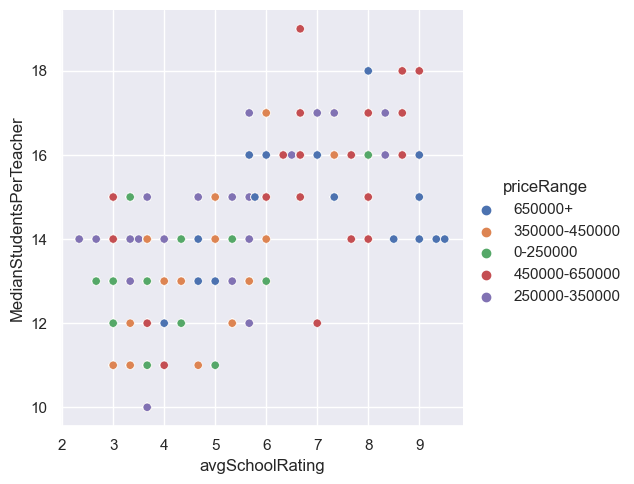

In [13]:
sns.relplot(data=df_bronz, x="avgSchoolRating", y="MedianStudentsPerTeacher", hue="priceRange",
            kind = 'scatter') # Gráfica relacional de dispersión.

Not clear correlation, **reccomendation**: continue exploration and variable importance

## Bathrooms

<Axes: xlabel='priceRange', ylabel='count'>

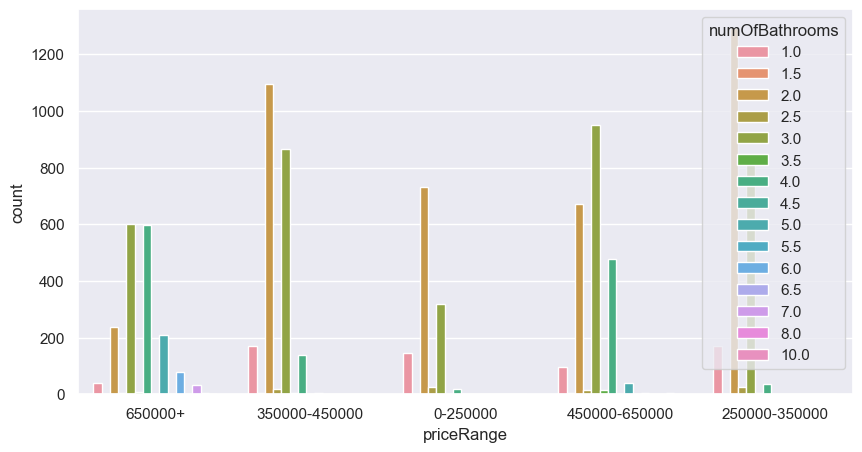

In [14]:
sns.countplot(df_bronz, x="priceRange", hue="numOfBathrooms")

<Axes: xlabel='numOfBathrooms', ylabel='count'>

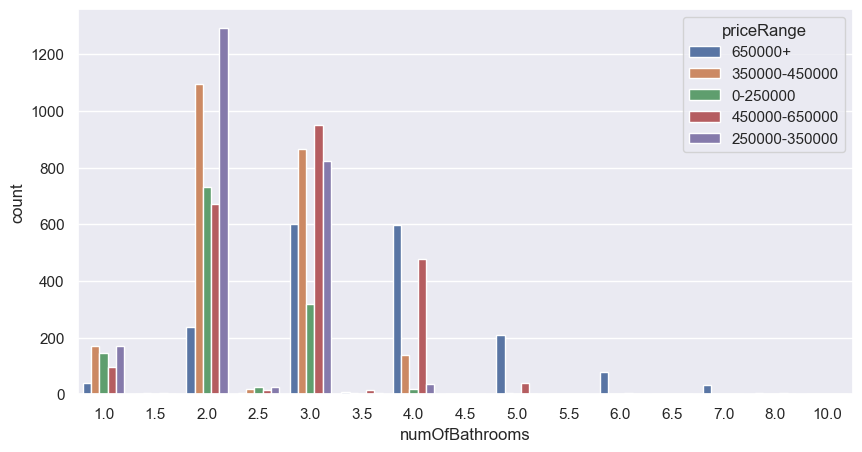

In [15]:
sns.countplot(df_bronz, x="numOfBathrooms", hue="priceRange")

Low tendence: high princeRange has more bathrooms

### numOfBedrooms and numOfBathrooms

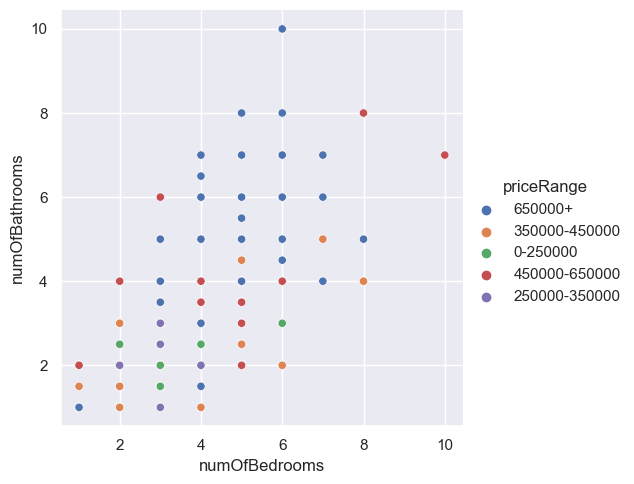

In [16]:
sns.relplot(data=df_bronz, x="numOfBedrooms", y="numOfBathrooms", hue="priceRange",
            kind = 'scatter') # Gráfica relacional de dispersión.

## Correlation analysis

### Hypotesis
*lot size, numbedrooms, numbathrooms, school variables and location are important variables 

In [17]:
df_dummies = pd.get_dummies(df_bronz[['priceRange']])
df_bronz_dum = df_bronz.join(df_dummies)

In [18]:
df_br_corr = df_bronz_dum.select_dtypes(include=['number','bool'])

In [20]:
df_bronz_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

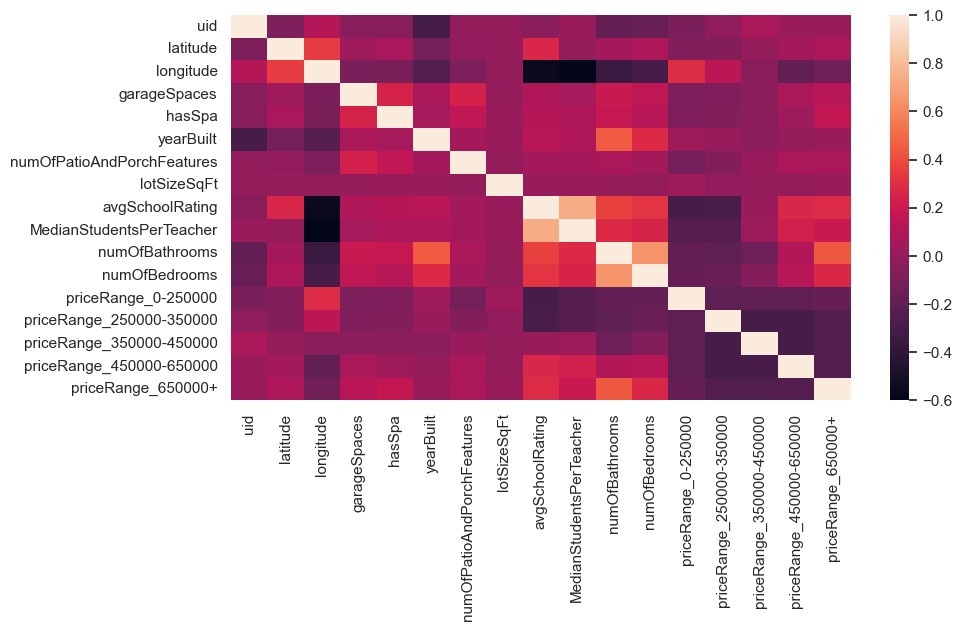

In [21]:
sns.heatmap(df_br_corr.corr());

### Correlation and EDA conclusions
* Number of bathrooms has correlation with the priceRange 650000+
* Not hightly important correlations with priceRange
* LotSize vs priceRange hans't clear correlation (hypothesis deprecated)

## Natural lenguage processing exploration

In [34]:
def clean_text(text_in):
    import re
    try:
        doc = nlp(text_in.lower())
        # Remove stopwords
        filtered_words = [token.text for token in doc if not token.is_stop]
       # Join the filtered words to form a clean text
        clean_text = ' '.join(filtered_words)
        # clean_text = re.sub('\W+',' ', clean_text)
        # clean_text = clean_text.replace("  "," ")
        return clean_text
    except:
        return ''

In [35]:
df_bronz_dum['clean_description'] = df_bronz_dum['description'].apply(clean_text)

In [36]:
df_bronz_dum[['clean_description','description']]

,clean_description,description
0,multiple offers submit best & final agent mon ...,MULTIPLE OFFERS submit best & final to Agent b...
1,"4644 hoffman dr , austin , tx 78749 single fam...","4644 Hoffman Dr, Austin, TX 78749 is a single ..."
2,"6804 canal st , austin , tx 78741 single famil...","6804 Canal St, Austin, TX 78741 is a single fa..."
3,beautiful large lot established trees . lovely...,Beautiful large lot with established trees. Lo...
4,stunning nw hills designer remodel cedar oak h...,Stunning NW Hills designer remodel by Cedar an...
...,...,...
9995,updated great hills opportunity ! large corner...,Updated Great Hills Opportunity! Large corner ...
9996,adorable 3/2 heart south austin ! situated lar...,Adorable 3/2 in the heart of South Austin! Sit...
9997,"7322 gaines mill ln , austin , tx 78745 single...","7322 Gaines Mill Ln, Austin, TX 78745 is a sin..."
9998,"5213 doe valley ln , austin , tx 78759 single ...","5213 Doe Valley Ln, Austin, TX 78759 is a sing..."


In [42]:
import random
for i in range(7):
    gen_num = random.randint(0,9999)
    print(gen_num," || ",df_bronz_dum['clean_description'][random.randint(0,9999)],"\n")

4698  ||  absolutely adorable*expanded / remodeled / updated tarrytown cottage*quaint story*open living - dining*oversized entertainer kitchen*commercial range fridge*giant butcher block island * custom cabinets soapstone counters*updated baths carrera marble*hardwood floors - out*desk / study nook*tankless water heater*metal roof*recent systems*flat yrd play space*back yard entertaining area , herb garden , outdr shower*plumbed outdoor kitchn*2 car garage*casis elem / ohenry jr / austin hi*a - - * 

1238  ||  stately 4 bed , 2.5 bath home corner lot desirable lakewood neighborhood boasts 3 living areas & 2 dining w/ vaulted ceilings , wood floors & plantation shutters . open updated kitchen w / granite countertops+island , ss appliances & walk - pantry.large master retreat main floor complete w / sitting area , private patio access , dual closets , en suite bath w / walk - shower & soaking tub . fresh interior paint ! community amenities include pool , tennis courts , basketball court

In [38]:
text = " ".join(review for review in df_bronz_dum.clean_description)
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 3731947 words in the combination of all descriptions.


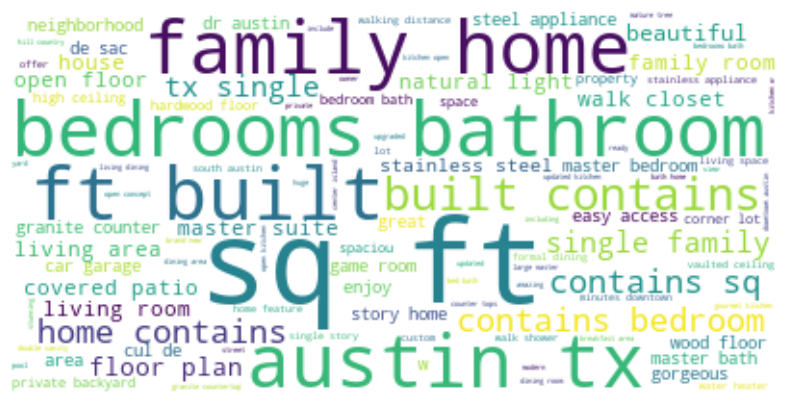

In [39]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There aren't important information in the 'description' analysisis. **Recommendation** not use for the modeling

In [43]:
df_bronz_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000